# Data Analysis - Understanding the Data
In this Section we perform a preliminary analysis to better understand the data. Aftewards, we dive in the ML models. 

# Import Libraries and Set Options
---

## Import Libraries

In [1]:
# Vector (Series) & Matrix (DateFrame) manipulation 
import numpy as np
import pandas as pd

In [2]:
# Data Visualization
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
import seaborn as sns

# If JaveScript is configured and enabled: 
# static images: 
# %matplotlib inline

# interactive images: 
# %matplotlib notebook

In [3]:
# Interactive Data Visualization
# import plotly.express as px

In [4]:
# Python Utilities
# Generate datetime objects from raw timestamps and vice versa
from datetime import datetime

# OS Interface
# import os

# Regex search patterns 
# import re

## Check Prerequisites

In [5]:
# calling np.version.version should return 1.18.1
# np.version.version

# calling pd.__version__ should return 1.1.2
# pd.__version__

## Set Options

In [6]:
# pd.set_option('display.max_columns',None)
# avoid truncate view of DataFrame (scroll to view all columns); set to 0 for pandas to auto-detect the with of the terminal and print truncated object that fits the screen width

# pd.set_option('float_format', '{:.2f}'.format)
# prints floats with two decimal points; do not comment out in this project since the features lat and lon have sigficant figures after two decimal points

In [7]:
# Display all outsputs if the cell has multiple commands as its input

# from IPython.core.interactiveshell import InteractiveShell
# InteractiveShell.ast_node_interactivity = "all"

In [8]:
# To ignore warnings

import warnings
warnings.filterwarnings('ignore')

## Scikit-learn Libraries

### Train | Test Split & Pre-Processing

In [9]:
# Split Function (see Signature for correct tuple unpacking)
# from sklearn.model_selection import train_test_split

# Default split
# X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42)

In [10]:
# When perfroming a classic Train | Test Spit fit ONLY to X_train to avoid data leakage! (Follow Procedure described in documentation under Cross Validation and Linear Regression Project)

# Data Scaling (iff values are in different order of magnitude)
# from sklearn.preprocessing import StandardScaler

In [11]:
# k-fold cross validation scores; estimator = ML model, cv = fold value, scoring = error metric (use the ones provided by sklearn!)

# from sklearn.model_selection import cross_val_score

In [12]:
# Polynomial Regression ( poly_trafo: X->X*...*X )
# from sklearn.preprocessing import PolynomialFeatures

In [13]:
# Grid search with cross vadlidation
# from sklearn.model_selection import GridSearchCV

### Linear Models

In [14]:
# Linear Regression Model
# from sklearn.linear_model import LinearRegression

In [15]:
# Elastic Net Regularization: start here for regularization in Linear Regression. Make sure to keep an l1_ratio that allows us to go fully to Lasso or fully to Ridge. See Lasso and Ridge explanations below. 
# from sklearn.linear_model import ElasticNetCV

# Use from sklearn.linear_model import ElasticNet in case CV done manually / grid search

# Standard procedure with no grid search: create X and y, split data, scale data (stadardize)
# Standard procedure with grid search: create X and y, split data, scale data (stadardize), instantiate base model, 

In [16]:
# L2: Ridge Regularization: adds beta squared shrinkage penalty. Hyper-parameter alpha: alpha=0 -> RSS minimization. L2 CV takes an alpha tuple and computes the hyper-parameter that delivers the best performance (either based on default scorer or one from the SCORES dictionary)
# from sklearn.linear_model import RidgeCV

# Use from sklearn.linear_model import Ridge in case CV done manually

In [17]:
# L1: Lasso Regularization: adds absolute beta value shrinkage penalty. Hyper-parameter alpha: alpha=0 -> RSS minimization. There are two ways to determine the alpha hyper-parameter: (a) provide list of alphas as an array (b) alpha can be set automatically by the class based off epsilon and n_alphas (we use the default values)
# from sklearn.linear_model import LassoCV

# Use from sklearn.linear_model import Lasso in case no CV done manually

### Support Vector Machines

In [18]:
# from sklearn.svm import SVR

# from sklearn.svm import LinearSVC
# faster than the generic version with the caveat that it only has a linear kernel

### Performance Metrics

In [19]:
# Performance Evaluation: common evaluation metrics; they can also be found in the SCORES dictionary (although transformed s.t. the higher the score the better, the model performance)
# from sklearn.metrics import mean_absolute_error, mean_squared_error

In [20]:
# Dictionary with different scorer objects; higher return values are better than lower return values by convention, e.g. negative error maximization -> the higher the score, the better the model performance
# from sklearn.metrics import SCORERS

In [21]:
# Normal Probability Plot
# import scipy as sp

### Model Deployment

In [22]:
# ML Model Deployment 
# from joblib import dump, load

# Read in Data and Instantiate DataFrame 
---
We read in the data produced in the Feature Engineering Notebook as assign it to the DataFrame 'df'. We also read in the data without dummy variables in case we want to use categorical features in our figures. 

In [23]:
df = pd.read_csv('./data/d-wo-ns.csv')

In [24]:
df_nd = pd.read_csv('./data/d-wo-ns-nd.csv')

In [25]:
df.columns

Index(['distance', 'lat', 'lon', 'alt', 'speed', 'acc', 'dir', 'rsrp', 'rsrq',
       'sinr', 'cqi', 'ta', 'payload', 'throughput', 'rtt', 'hour',
       'ci_26378497', 'ci_26378498', 'ci_26378754', 'ci_26378755',
       'ci_26379013', 'ci_26385408', 'ci_26385409', 'ci_26385410',
       'ci_26796290', 'ci_26796291', 'ci_27029251', 'ci_27256324',
       'ci_27256325', 'ci_27299331', 'ci_27299332', 'ci_27770883',
       'ci_27770885', 'ci_27770886', 'ci_27770888', 'ci_27770889',
       'ci_27771139', 'ci_27771140', 'ci_27771904', 'ci_27771905',
       'ci_27771906', 'ci_27771907', 'ci_27771908', 'ci_27771909',
       'ci_28365056', 'ci_28365057', 'ci_28365058', 'ci_28365063',
       'ci_28367105', 'ci_28367106', 'ci_28368384', 'ci_28368386',
       'ci_28368642', 'ci_28368651', 'ci_28371200', 'ci_28371201',
       'ci_28371202', 'ci_29391104', 'ci_29391105', 'ci_29391106',
       'ci_29398276', 'ci_29401601', 'ci_29563904', 'ci_29568768',
       'ci_29568769', 'ci_29568770', 'ci_29908736

In [26]:
df_nd.columns

Index(['distance', 'lat', 'lon', 'alt', 'speed', 'acc', 'dir', 'rsrp', 'rsrq',
       'sinr', 'cqi', 'ta', 'ci', 'payload', 'throughput', 'rtt', 'region',
       'hour', 'weekday'],
      dtype='object')

In [27]:
df.head()

,distance,lat,lon,alt,speed,acc,dir,rsrp,rsrq,sinr,...,ci_33527559,ci_33527561,ci_33837570,region_highway,region_suburban,region_urban,weekday_Monday,weekday_Thursday,weekday_Tuesday,weekday_Wednesday
0,99.42,51.490553,7.413966,157.63,11.83,0.00,79.35,-85,-5,22,...,0,0,0,0,0,0,1,0,0,0
1,237.43,51.490715,7.416002,152.41,10.76,-0.52,89.45,-84,-6,11,...,0,0,0,0,0,0,1,0,0,0
2,325.26,51.490668,7.417176,154.64,6.19,-0.62,27.05,-82,-6,21,...,0,0,0,0,0,0,1,0,0,0
3,448.27,51.491839,7.416804,155.87,9.77,-0.98,342.45,-94,-9,9,...,0,0,0,0,0,0,1,0,0,0
4,540.48,51.492531,7.416222,154.41,12.33,0.01,336.68,-90,-6,16,...,0,0,0,0,0,0,1,0,0,0


In [28]:
df_nd.head()

,distance,lat,lon,alt,speed,acc,dir,rsrp,rsrq,sinr,cqi,ta,ci,payload,throughput,rtt,region,hour,weekday
0,99.42,51.490553,7.413966,157.63,11.83,0.00,79.35,-85,-5,22,10,7,26385408,0.1,6.83763,41,campus,10,Monday
1,237.43,51.490715,7.416002,152.41,10.76,-0.52,89.45,-84,-6,11,13,4,29391105,2.0,9.71463,58,campus,10,Monday
2,325.26,51.490668,7.417176,154.64,6.19,-0.62,27.05,-82,-6,21,15,4,29391105,2.0,7.30594,57,campus,10,Monday
3,448.27,51.491839,7.416804,155.87,9.77,-0.98,342.45,-94,-9,9,9,4,29391105,3.0,3.94997,163,campus,10,Monday
4,540.48,51.492531,7.416222,154.41,12.33,0.01,336.68,-90,-6,16,9,4,29391105,5.0,8.54884,59,campus,10,Monday


In [29]:
df.shape

(2141, 87)

In [30]:
df_nd.shape

(2141, 19)

# Preliminary Analysis
First, we perform a preliminary visual analysis to better understand the data and check the plausibility of our results. We use features with high correlation to the label and categorical features for our preliminary analysis. 

In [31]:
df_vis = df[['payload', 'rsrp', 'rsrq', 'sinr', 'cqi', 'throughput']]

In [32]:
df_nd_vis = df_nd[['payload', 'rsrp', 'rsrq', 'sinr', 'cqi', 'region','throughput','weekday','hour']]

In [33]:
df_vis.shape

(2141, 6)

<Figure size 1152x1152 with 0 Axes>

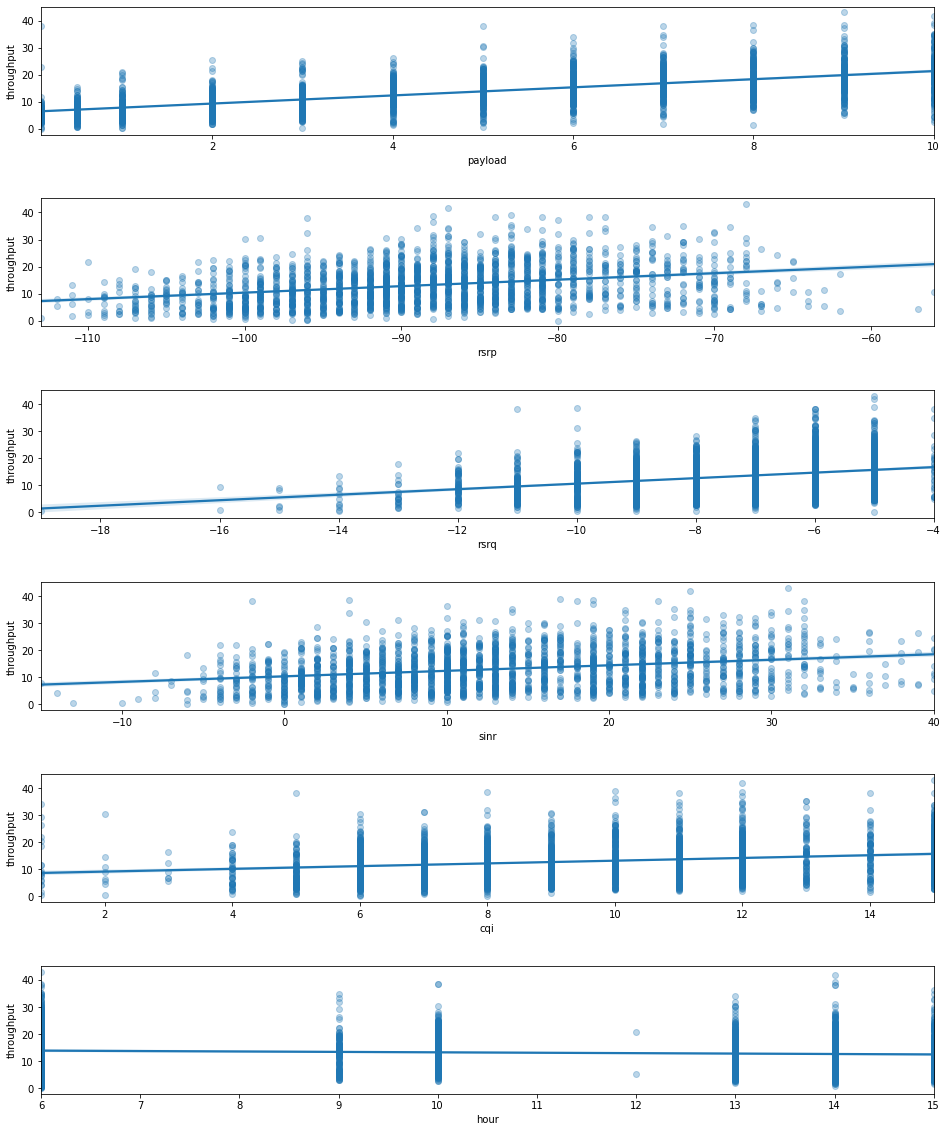

In [34]:
# Most Network Context / Channel Performance Features (with the exception of TA) have a positive correlation with the Label

plt.figure(figsize=(16,16))

fig,axes = plt.subplots(nrows=6, ncols=1,figsize=(16,20))

for i, column in enumerate(df_nd_vis.drop(['throughput','region','weekday'], axis=1)):
    sns.regplot(data=df_nd_vis, x=column, y='throughput', ax=axes[i], scatter_kws={'alpha':0.3})
    # ax.legend(loc=(1.03,0.5))

plt.subplots_adjust(hspace = 0.5)

<Figure size 1152x1152 with 0 Axes>

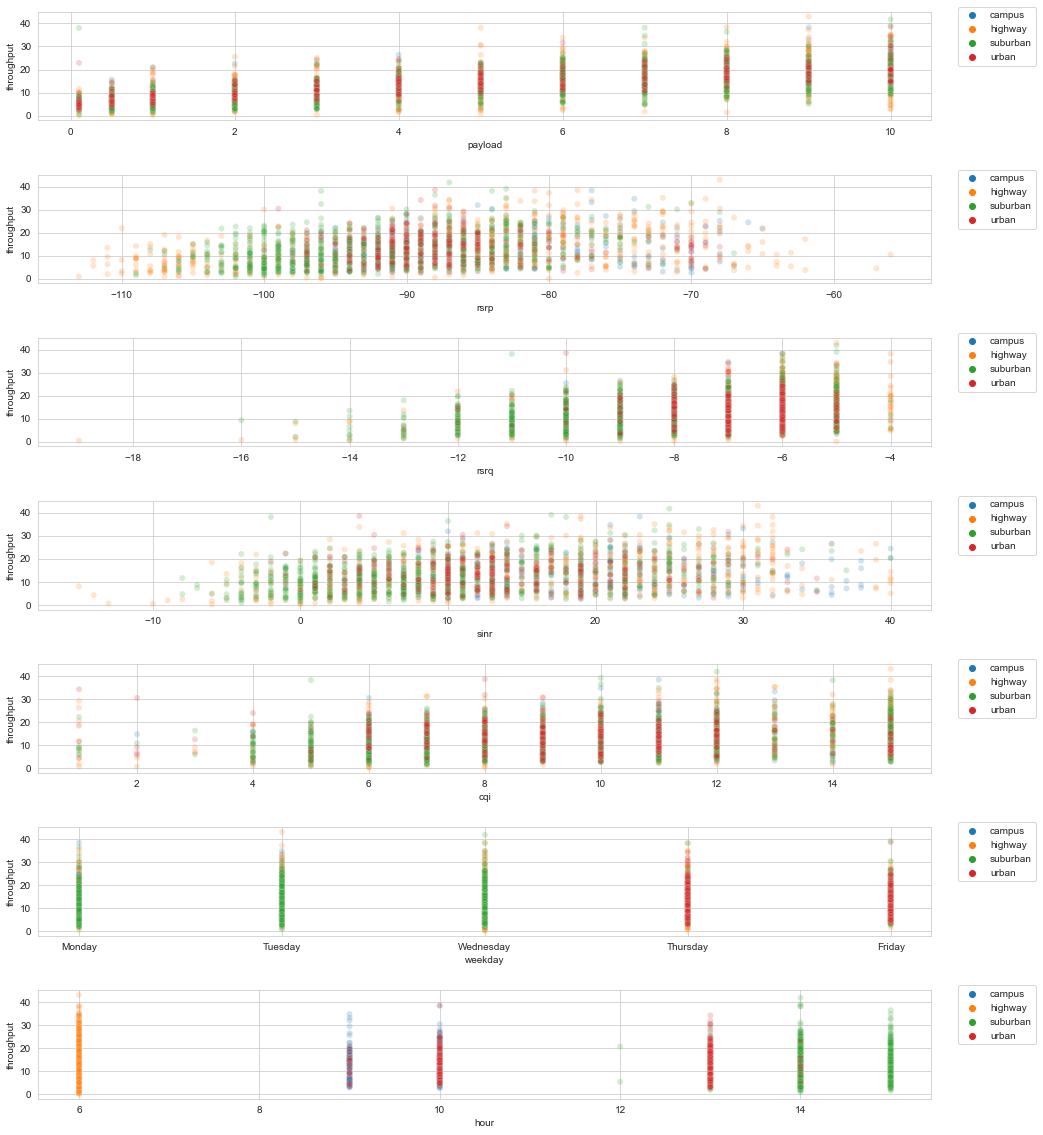

In [35]:
plt.figure(figsize=(16,16))
sns.set_style('whitegrid')

fig,axes = plt.subplots(nrows=7, ncols=1,figsize=(16,20))

for i, column in enumerate(df_nd_vis.drop(['throughput','region'], axis=1)):
    ax = sns.scatterplot(data=df_nd_vis, x=column, y='throughput', ax=axes[i],hue='region',alpha=.2)
    ax.legend(loc=(1.03,0.5))
    # axes[i].set_title(f'{column.capitalize()}') 

plt.subplots_adjust(hspace = 0.5)

# The region plays a significant role in determining the mean and variance
# Systemic errors caused by the uneven distribution of the data points regarding weekday and hour

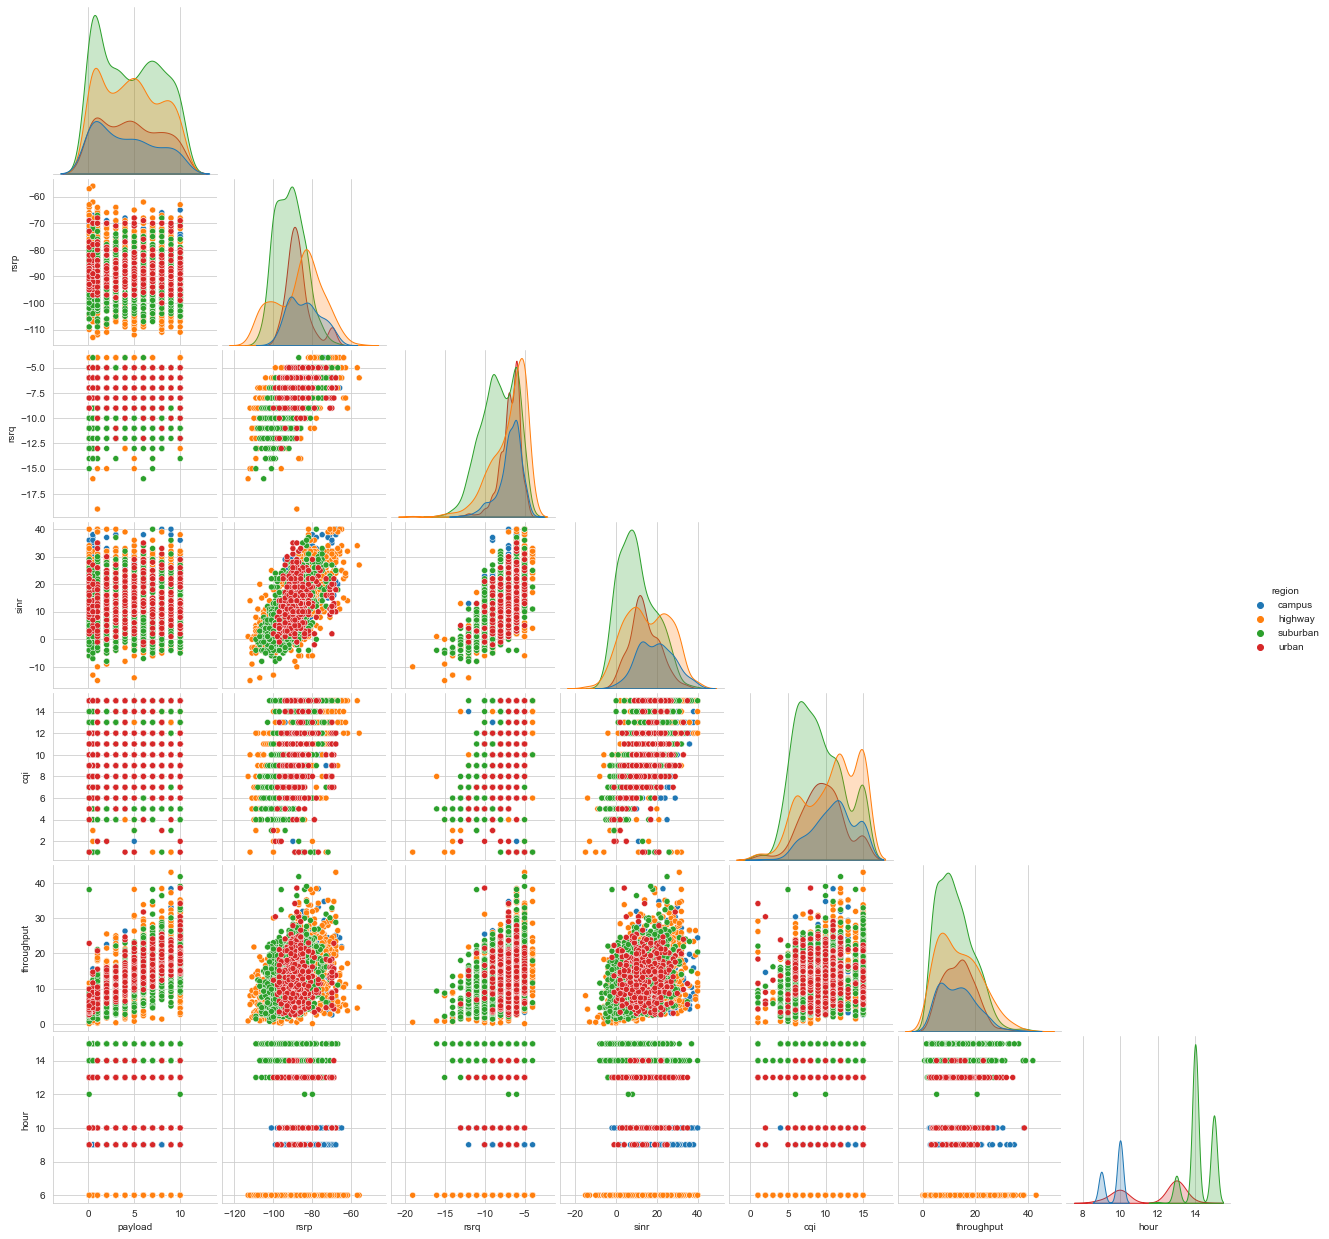

In [36]:
sns.pairplot(data=df_nd_vis,hue='region',corner=True)
# important: (a) througput row and (b) last cell
# ignore warning

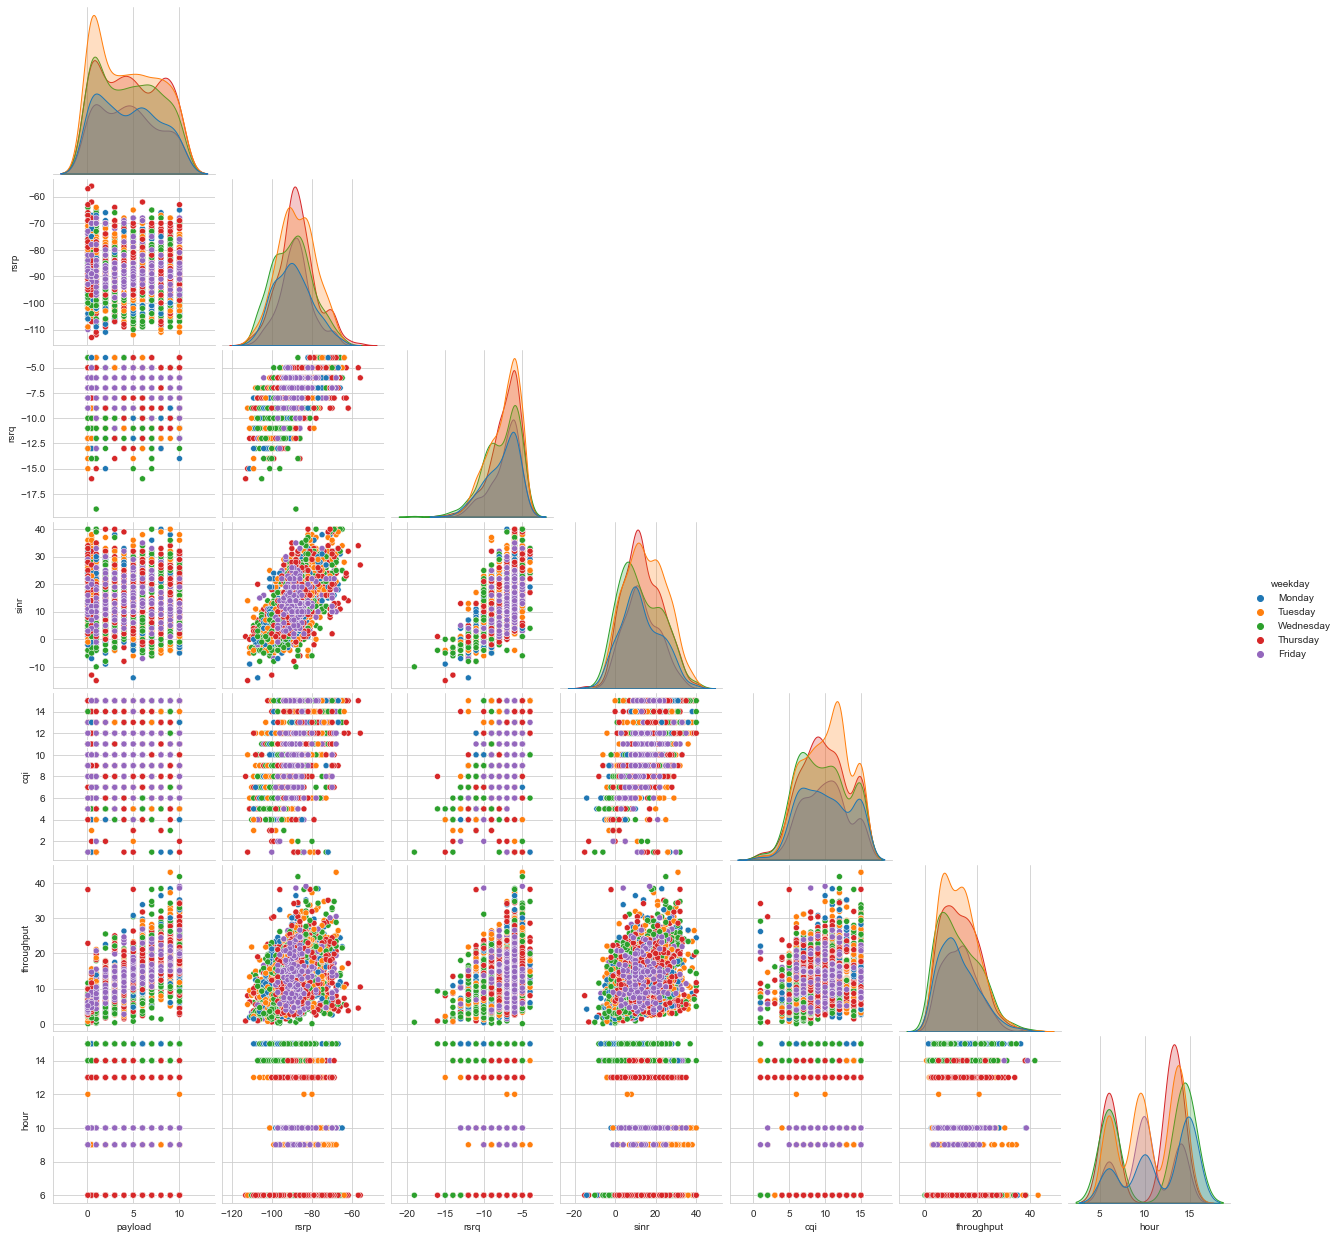

In [37]:
sns.pairplot(data=df_nd_vis,hue='weekday',corner=True)
# important: (a) througput row and (b) last cell

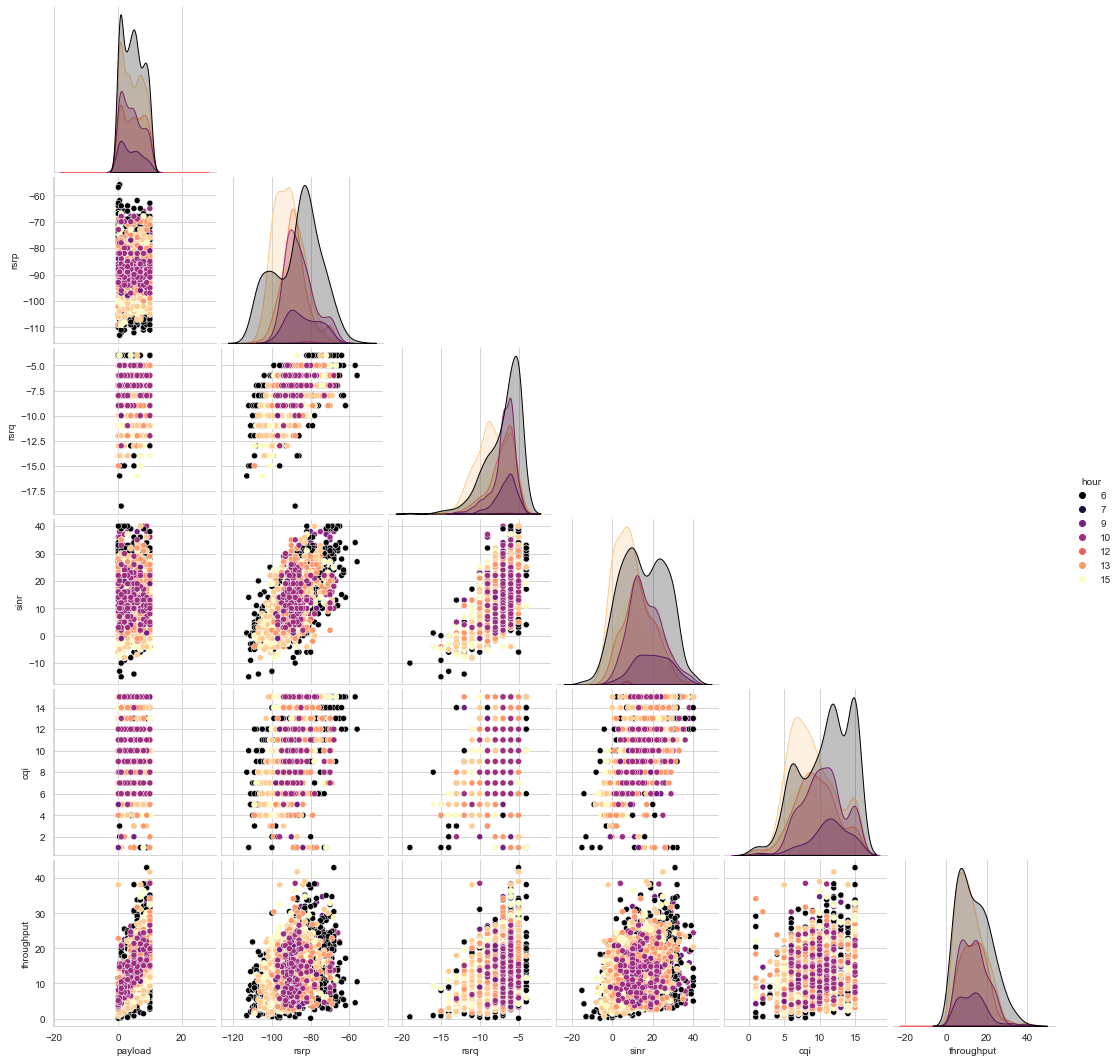

In [38]:
sns.pairplot(data=df_nd_vis,hue='hour',corner=True,palette='magma')

<AxesSubplot:xlabel='throughput', ylabel='region'>

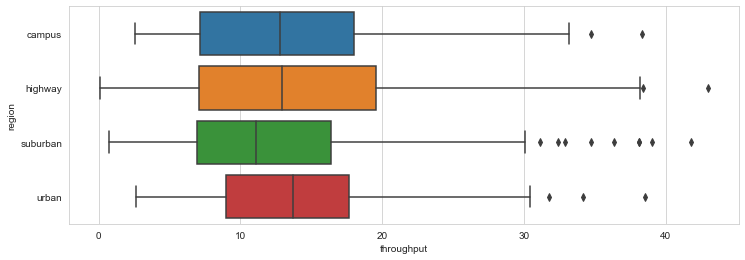

In [39]:
plt.figure(figsize=(12,4))
sns.boxplot(data=df_nd_vis, x='throughput',y='region')

<AxesSubplot:xlabel='throughput', ylabel='weekday'>

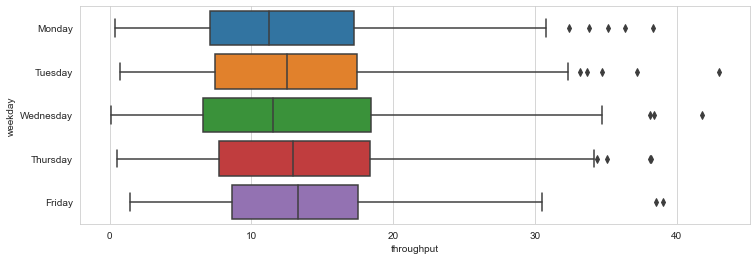

In [40]:
plt.figure(figsize=(12,4))
sns.boxplot(data=df_nd_vis, x='throughput',y='weekday')

<AxesSubplot:xlabel='throughput', ylabel='hour'>

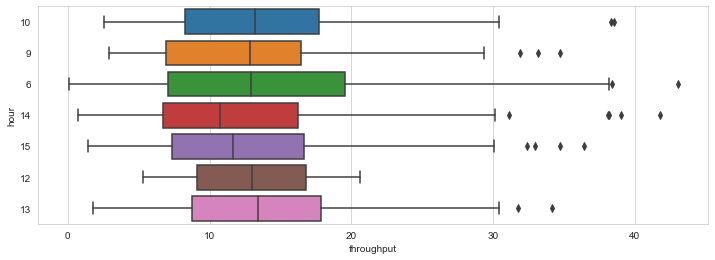

In [41]:
plt.figure(figsize=(12,4))
data = df_nd_vis.copy()
data['hour'] = data['hour'].apply(str)
sns.boxplot(data=data, x='throughput',y='hour')

# Feature Distributions
---

In [42]:
# df.columns

In [43]:
# for i, column in enumerate(df.columns): 
#     print(f'{i}. {column}')
#     if column == 'hour': 
#         break

In [44]:
# remove cateorical features
hist_columns = []

for column in df.columns: 
    hist_columns.append(column)
    if column == 'hour': 
        break

In [45]:
len(hist_columns)

16

<Figure size 1152x1152 with 0 Axes>

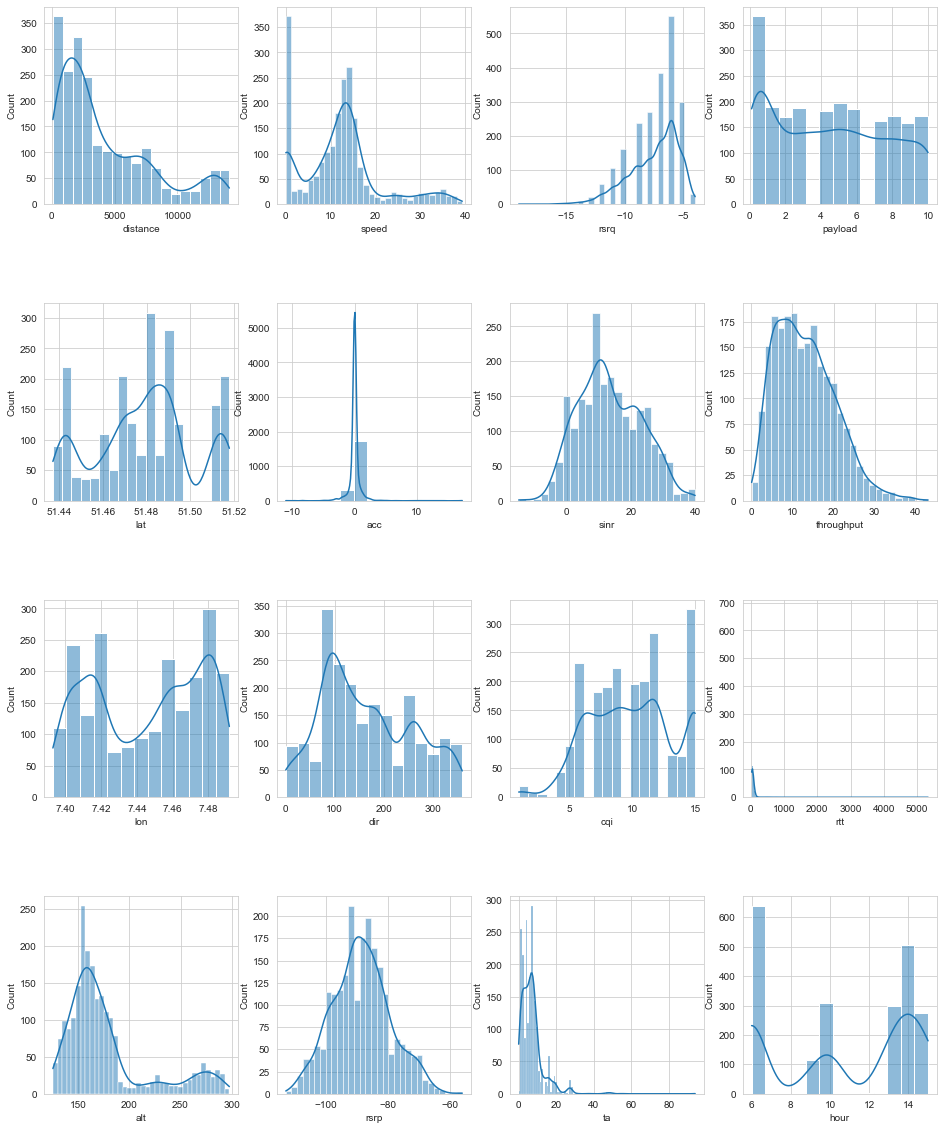

In [46]:
plt.figure(figsize=(16,16))

fig,axes = plt.subplots(nrows=4, ncols=4,figsize=(16,20))

c = 0
for i, column in enumerate(df[hist_columns]):
    sns.histplot(data=df, x=column,ax=axes[i%4,c],kde=True)
    # print(f'{i%4}:{c}')
    if i%4 == 3: 
        c+=1
        
    # ax.legend(loc=(1.03,0.5))

plt.subplots_adjust(hspace = 0.5)

# None of the features are normally distributed -> choose adequate scalar for the ML model
# rtt has a huge standard deviation! 

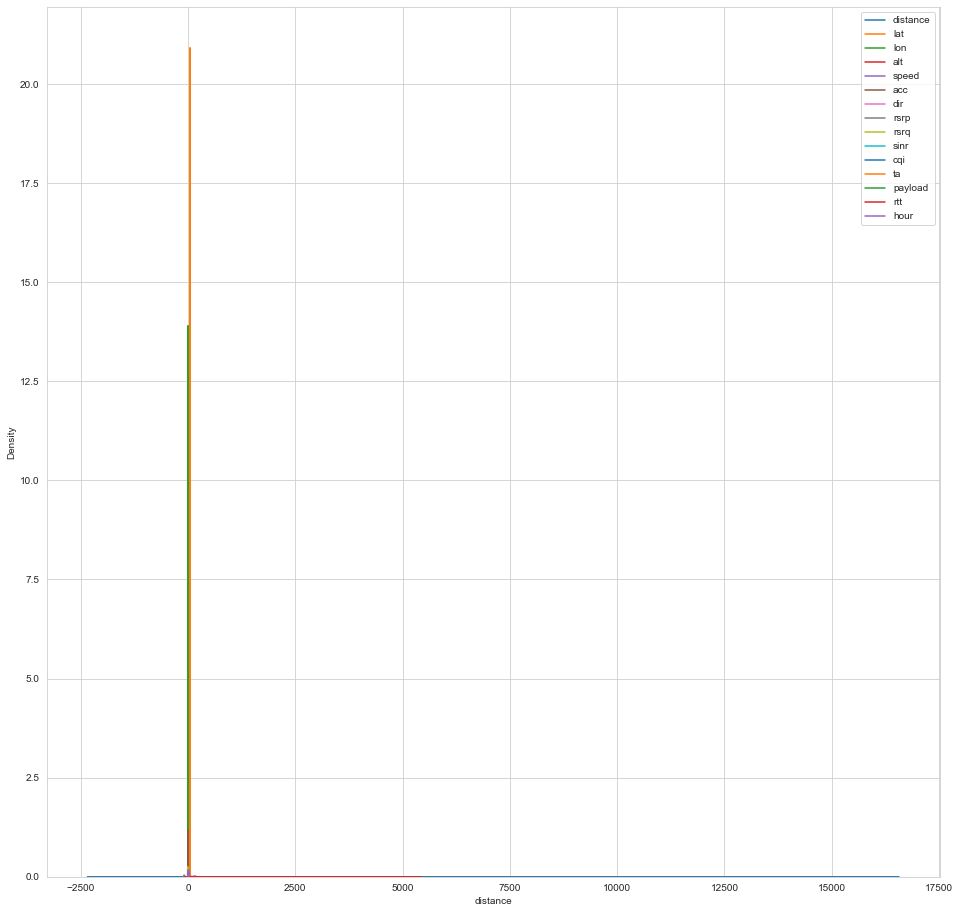

In [47]:
fig,ax = plt.subplots(figsize=(16,16))

for column in df[hist_columns].drop('throughput',axis=1): 
    # print(column)
    sns.kdeplot(df[hist_columns][column], ax=ax, shade=False, label=column)
    
ax.legend(loc='best')

# widly different scales between the features -> scaling is necessary! 

# Select Preprocessing Scaler 
---
We explore the different scaler options. 

## Instantiate the different Scalers

In [48]:
from sklearn import preprocessing

In [49]:
X = df[hist_columns].drop(['throughput'],axis=1)

In [50]:
mm_scaler = preprocessing.MinMaxScaler()
rb_scaler = preprocessing.RobustScaler()
st_scaler = preprocessing.StandardScaler()

In [51]:
X_mm = mm_scaler.fit_transform(X)
X_rb = rb_scaler.fit_transform(X)
X_st = st_scaler.fit_transform(X)

In [52]:
X_mm = pd.DataFrame(X_mm,columns=X.columns)
X_rb = pd.DataFrame(X_rb,columns=X.columns)
X_st = pd.DataFrame(X_st,columns=X.columns)

# we avoid loops in this section to make the code easy to understand. In the subsequent Notebook we create a loop that iterates the different scalers. 

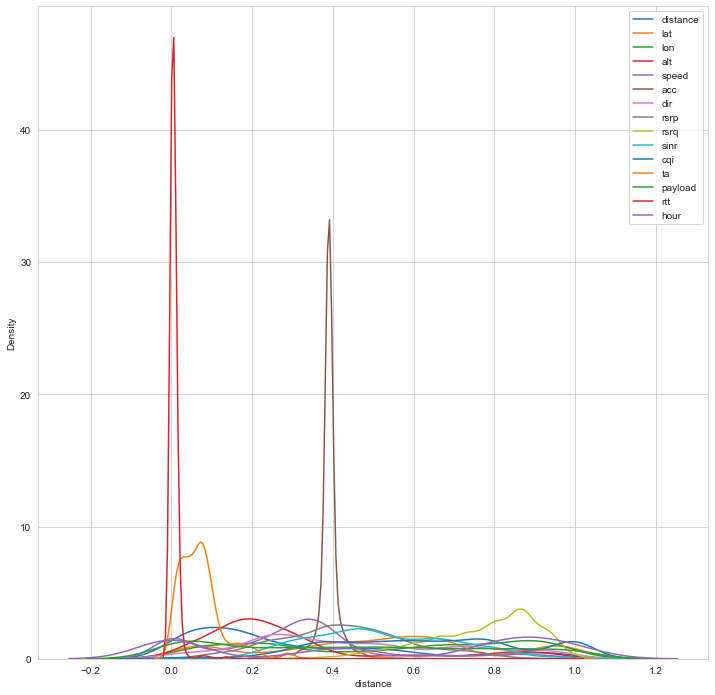

In [53]:
# MinMaxScaler

fig,ax = plt.subplots(figsize=(12,12))

for column in X_mm: 
    # print(column)
    sns.kdeplot(x=X_mm[column], ax=ax, shade=False, label=column)
    
ax.legend(loc='best')

# widly different scales between the features -> scaling is necessary! 

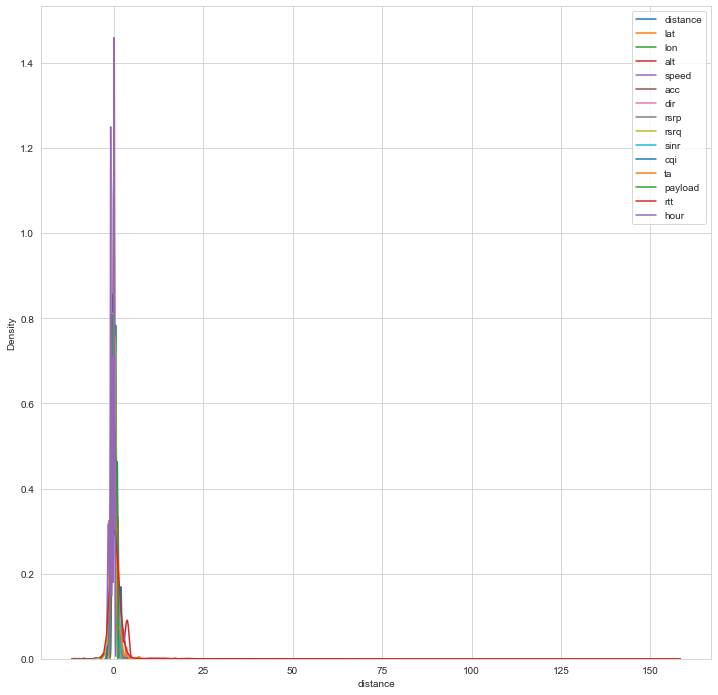

In [54]:
# RobustScaler

fig,ax = plt.subplots(figsize=(12,12))

for column in X_rb: 
    # print(column)
    sns.kdeplot(X_rb[column], ax=ax, shade=False, label=column)
    
ax.legend(loc='best')

# widly different scales between the features -> scaling is necessary! 
# all the distributions are on the left side of the grap -> look into max values and drop feature with high standard deviation

In [55]:
# for column in X_rb:
#     if X_rb[column].max() > 10: 
#         print(f"{column}_max = {X_rb[column].max():.3f}")
#         
# note that rtt has an extremely high value! -> use min-max-scaler or drop feature

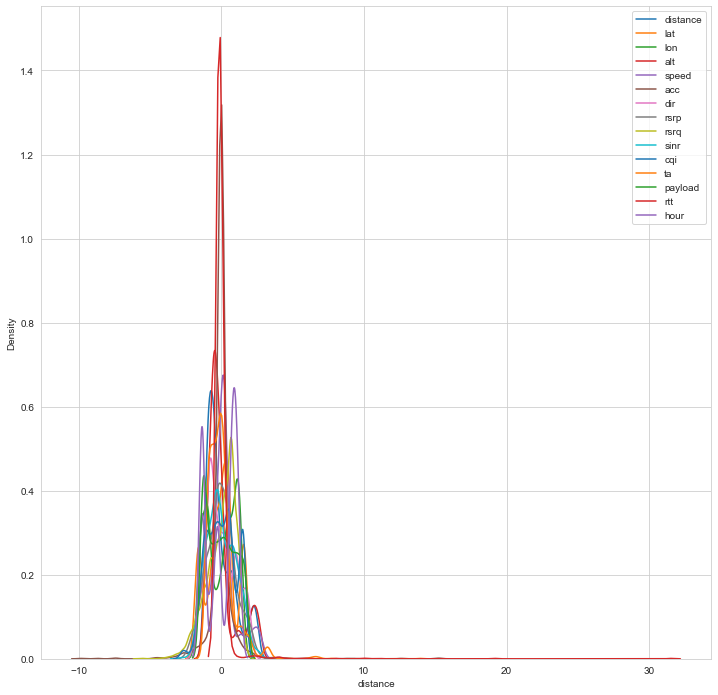

In [56]:
# StandardScaler

fig,ax = plt.subplots(figsize=(12,12))

for column in X_st: 
    # print(column)
    sns.kdeplot(X_st[column], ax=ax, shade=False, label=column)
    
ax.legend(loc='best')

# widly different scales between the features -> scaling is necessary! 
# all the distributions are on the left side of the grap -> look into max values and drop feature with high standard deviation

In [57]:
# for column in X_st:
#     if X_st[column].max() > 5: 
#         print(f"{column}_max = {X_st[column].max():.3f}")
#         
# note that rtt has an extremely high value! -> use min-max-scaler or drop feature

DONE!